In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')

In [3]:
data.shape

(214, 11)

In [4]:
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data['Type of glass'].replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1},inplace=True)

dividing dataset into window glass (classes 1-4) and non-window glass (classes 5-7)

In [6]:
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [7]:
data['Type of glass'].nunique()

2

In [8]:
data['Type of glass'].value_counts()

0    163
1     51
Name: Type of glass, dtype: int64

In [9]:
data.drop('ID',axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
data.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

no null values pressent

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type of glass,214.0,0.238318,0.427053,0.00000,0.000000,0.00000,0.000000,1.00000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

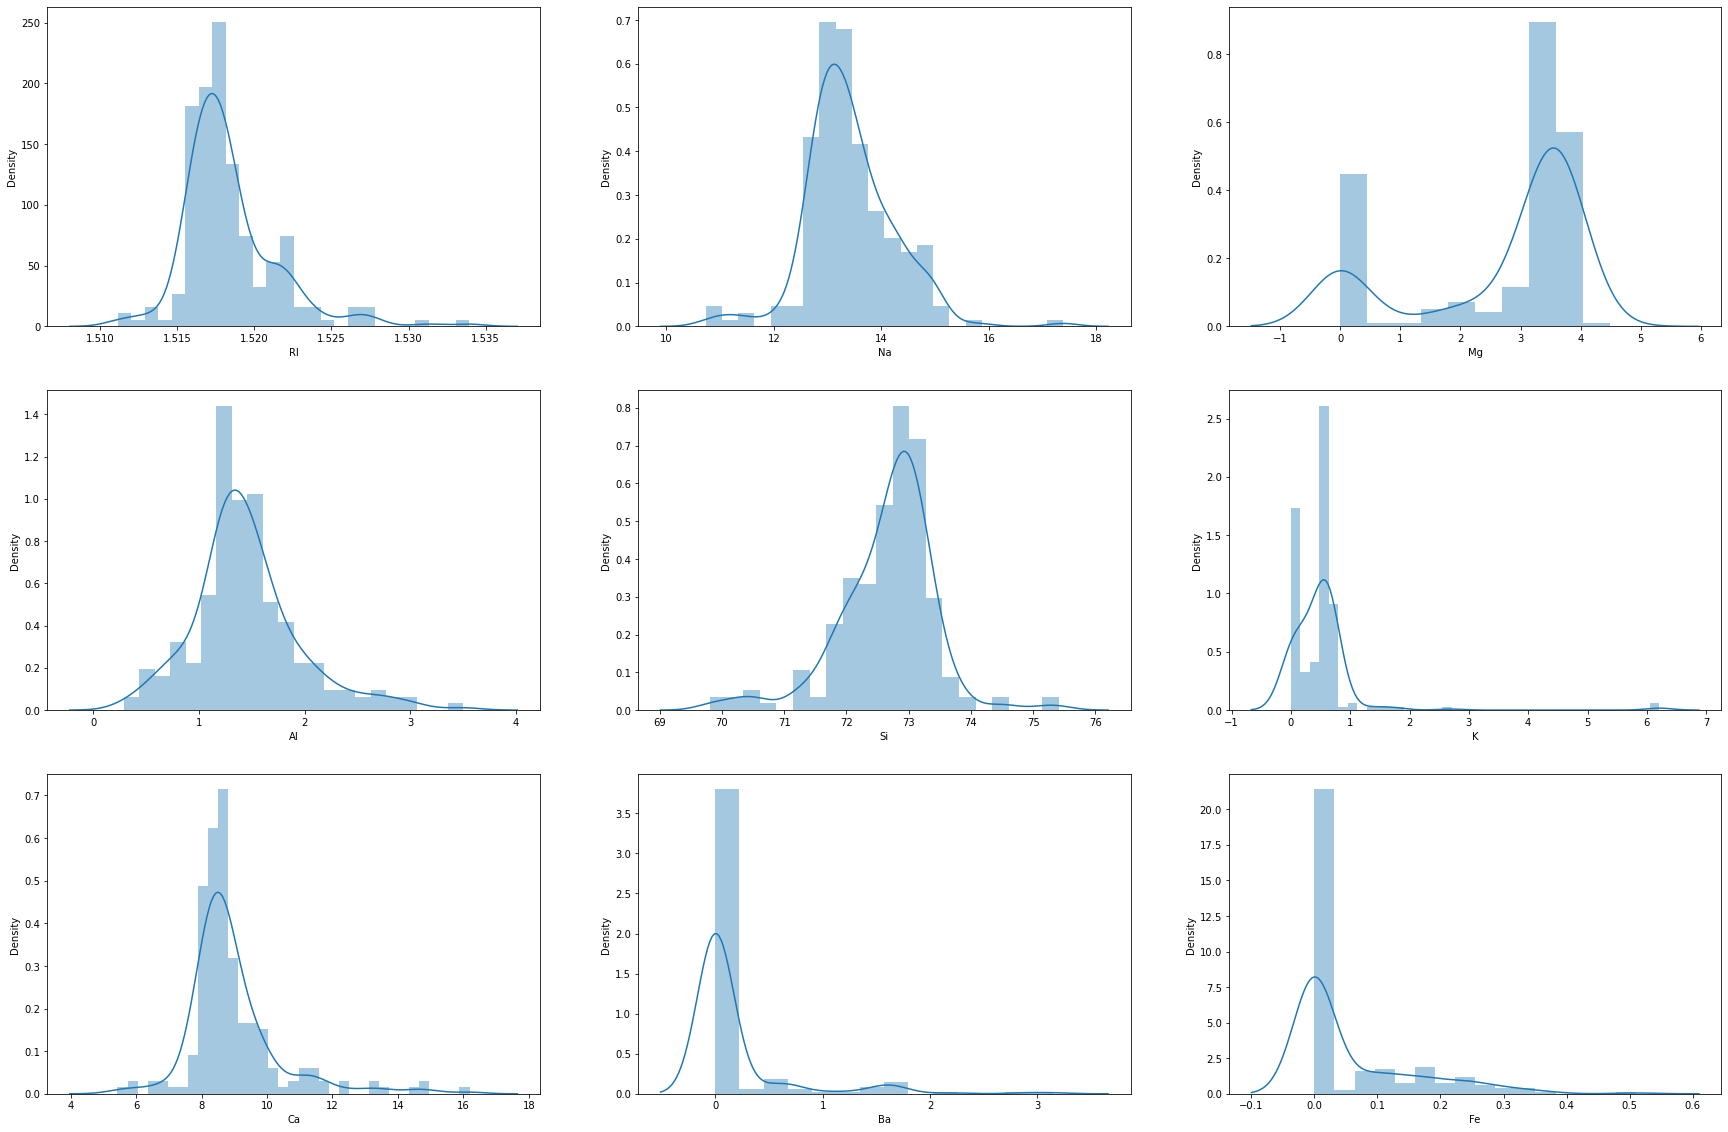

In [14]:
plt.figure(figsize=(30,20))

plotnumber = 1

for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

some of the features are skewed and some of them are not normally distributed

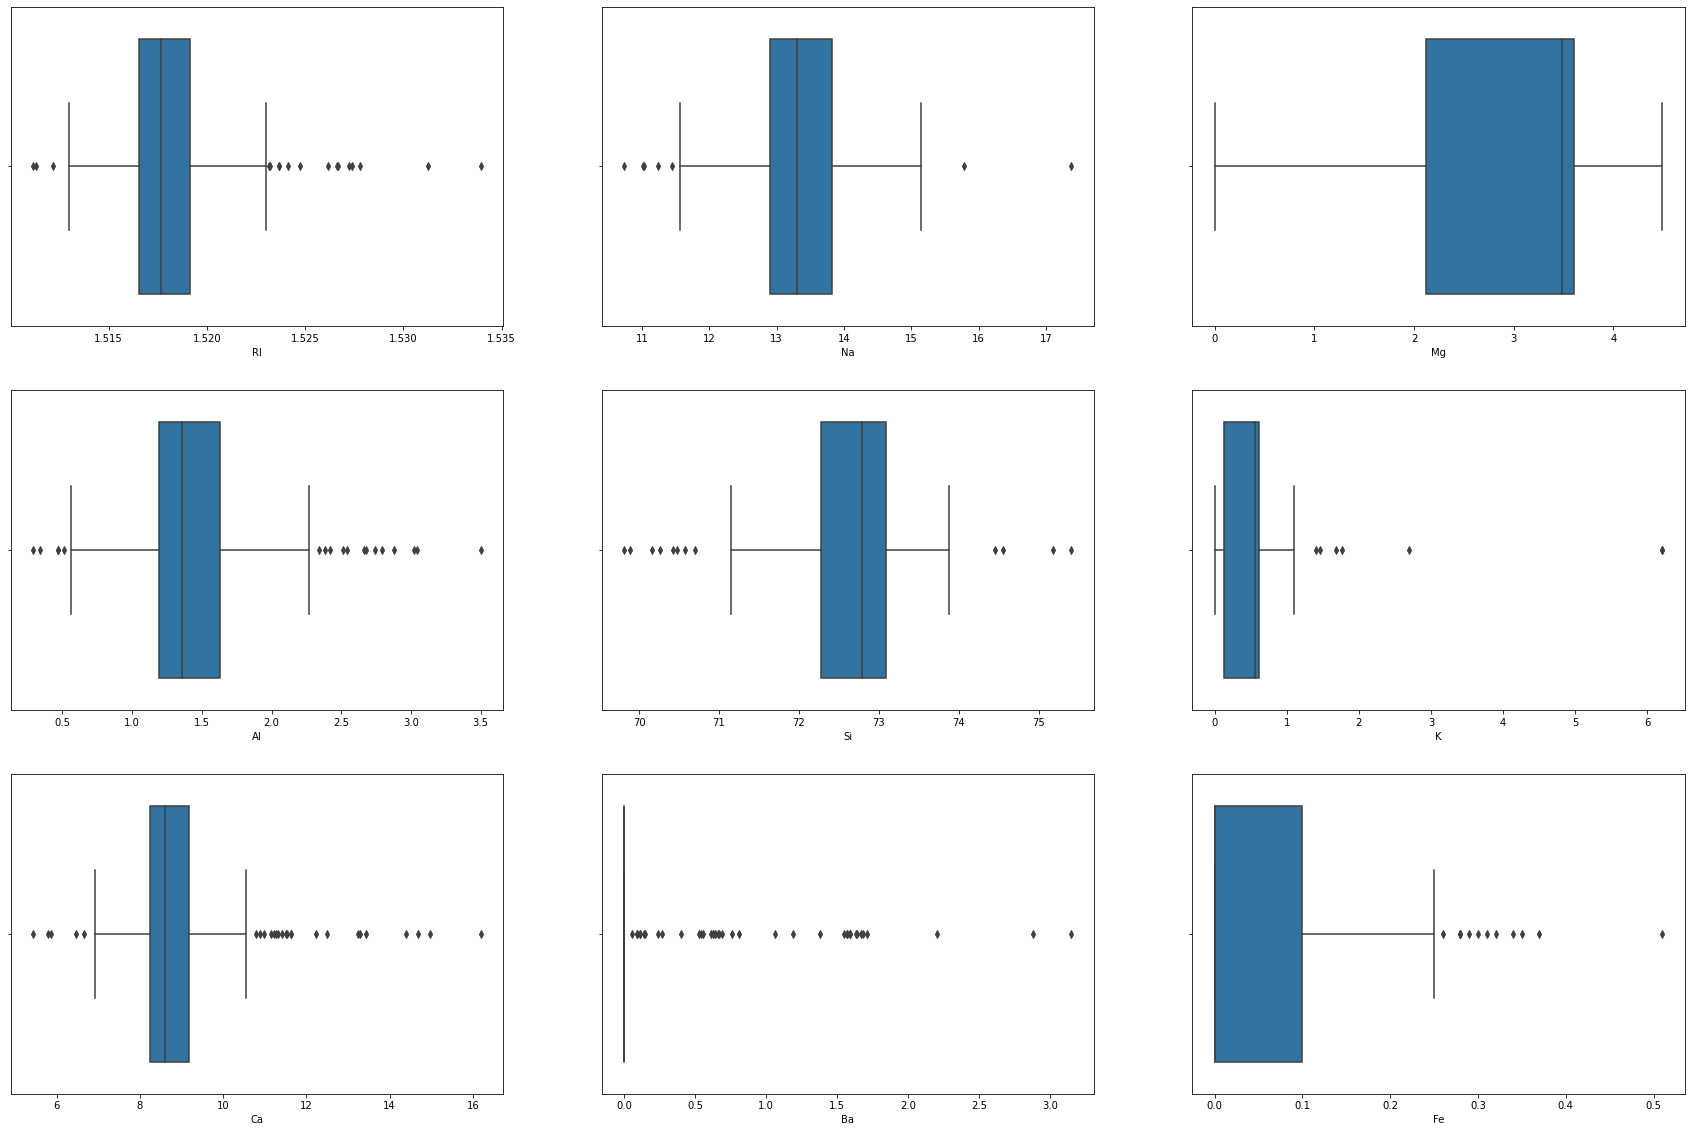

In [15]:
plt.figure(figsize=(30,20))

plotnumber = 1

for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

almost all features except Mg have outliers

In [16]:
data.skew().sort_values()

Mg              -1.152559
Si              -0.730447
Na               0.454181
Al               0.907290
Type of glass    1.237086
RI               1.625431
Fe               1.754327
Ca               2.047054
Ba               3.416425
K                6.551648
dtype: float64

In [17]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903
Type of glass,-0.134327,0.452336,-0.758289,0.585928,0.148072,0.053774,0.040670,0.523403,-0.194903,1.000000


In [18]:
data.corr()['Type of glass'].sort_values()

Mg              -0.758289
Fe              -0.194903
RI              -0.134327
Ca               0.040670
K                0.053774
Si               0.148072
Na               0.452336
Ba               0.523403
Al               0.585928
Type of glass    1.000000
Name: Type of glass, dtype: float64

Ca and K have the least realtion with the label

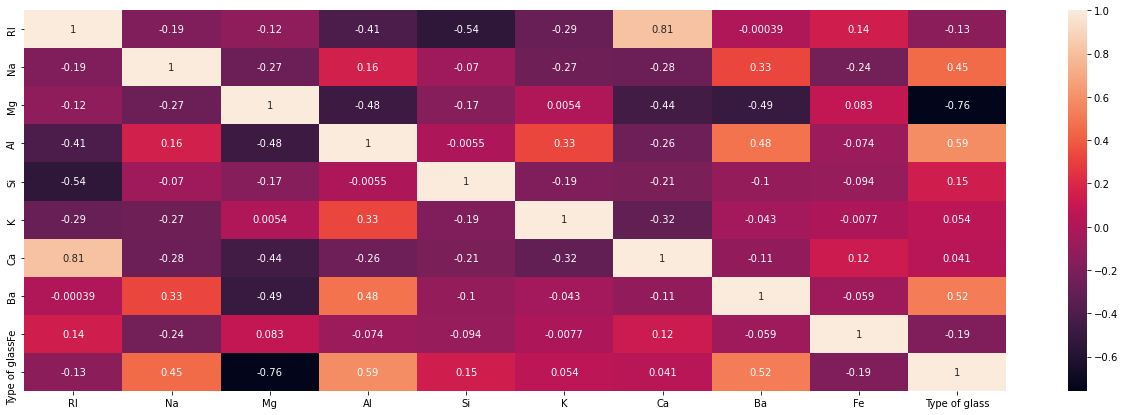

In [19]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

In [20]:
data.drop(['Ca','K'],axis=1,inplace=True)

dropping features with least relation to the label

In [21]:
data.head()

,RI,Na,Mg,Al,Si,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.0,0.0,0


In [22]:
data.shape

(214, 8)

In [23]:
columns = list(data.columns)

In [24]:
features = columns[:7]

In [25]:
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe']

In [26]:
from sklearn.preprocessing import PowerTransformer

In [27]:
pt = PowerTransformer()

In [28]:
data[features] = pt.fit_transform(data[features])

appling power transformer to reduce skewness in the data

In [29]:
data.skew()

RI               0.000000
Na              -0.008973
Mg              -0.889528
Al               0.000219
Si               0.130384
Ba               1.824175
Fe               0.858508
Type of glass    1.237086
dtype: float64

In [30]:
data.head()

,RI,Na,Mg,Al,Si,Ba,Fe,Type of glass
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-0.45489,-0.680015,0
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,-0.45489,-0.680015,0
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,-0.45489,-0.680015,0
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,-0.45489,-0.680015,0
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,-0.45489,-0.680015,0


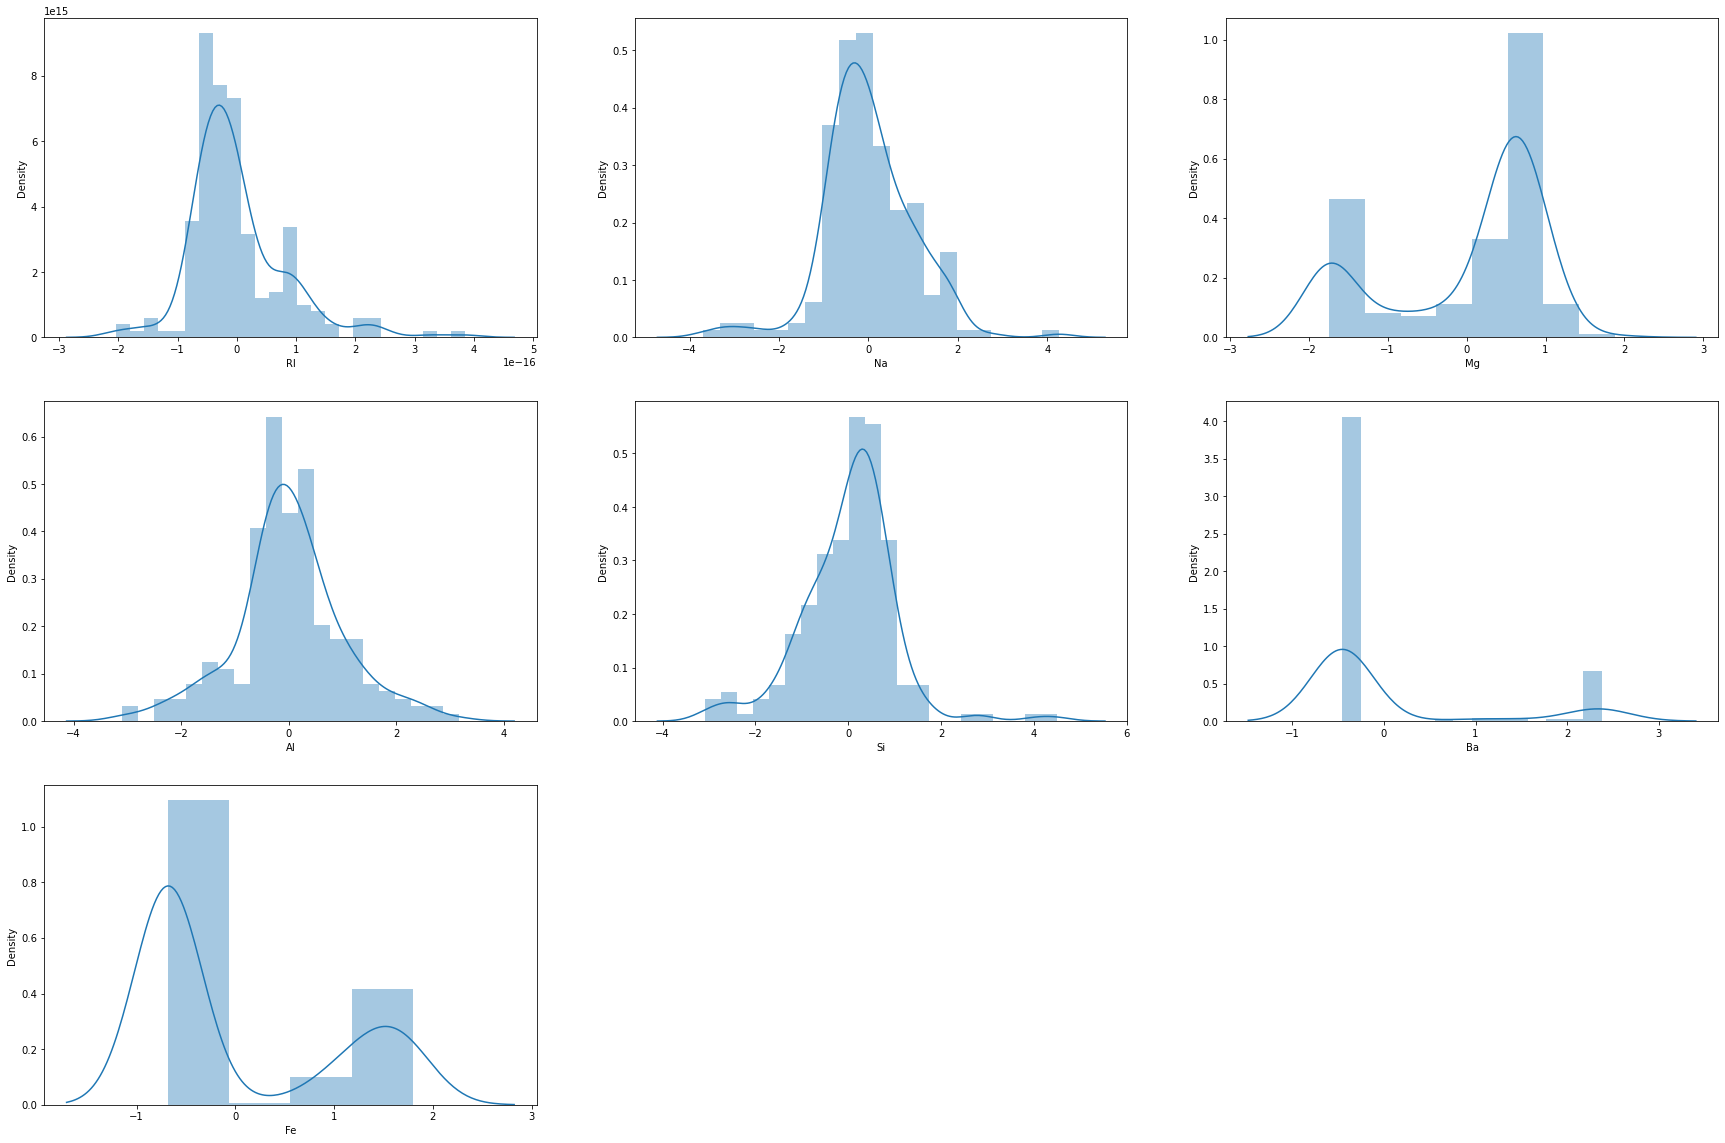

In [31]:
plt.figure(figsize=(30,20))

plotnumber = 1

for column in data:
    if plotnumber <=7:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
x = data.drop('Type of glass',axis=1)

y = data['Type of glass']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=987)

# LR

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
pred1 = lr.predict(x_train)

In [38]:
pred2 = lr.predict(x_test)

In [39]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.9590643274853801


In [40]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9767441860465116


In [41]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.89      1.00      0.94         8

    accuracy                           0.98        43
   macro avg       0.94      0.99      0.96        43
weighted avg       0.98      0.98      0.98        43



In [42]:
print(confusion_matrix(y_test,pred2))

[[34  1]
 [ 0  8]]


In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cv = cross_val_score(lr,x,y)

cv_mean = cv.mean()

cv_mean

0.8883720930232558

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
pred1 = knn.predict(x_train)

In [49]:
pred2 = knn.predict(x_test)

In [50]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.9473684210526315


In [51]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9534883720930233


In [52]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.80      1.00      0.89         8

    accuracy                           0.95        43
   macro avg       0.90      0.97      0.93        43
weighted avg       0.96      0.95      0.96        43



In [53]:
print(confusion_matrix(y_test,pred2))

[[33  2]
 [ 0  8]]


In [54]:
cv = cross_val_score(knn,x,y)

cv_mean = cv.mean()

cv_mean

0.8790697674418606

# DT

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
pred1 = dt.predict(x_train)

In [59]:
pred2 = dt.predict(x_test)

In [60]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 1.0


In [61]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9302325581395349


In [62]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.73      1.00      0.84         8

    accuracy                           0.93        43
   macro avg       0.86      0.96      0.90        43
weighted avg       0.95      0.93      0.93        43



In [63]:
print(confusion_matrix(y_test,pred2))

[[32  3]
 [ 0  8]]


In [64]:
cv = cross_val_score(dt,x,y)

cv_mean = cv.mean()

cv_mean

0.8697674418604653

# RF

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
pred1 = rf.predict(x_train)

In [69]:
pred2 = rf.predict(x_test)

In [70]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 1.0


In [71]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9534883720930233


In [72]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.80      1.00      0.89         8

    accuracy                           0.95        43
   macro avg       0.90      0.97      0.93        43
weighted avg       0.96      0.95      0.96        43



In [73]:
print(confusion_matrix(y_test,pred2))

[[33  2]
 [ 0  8]]


In [74]:
cv = cross_val_score(rf,x,y)

cv_mean = cv.mean()

cv_mean

0.8837209302325583

# ada

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
ada = AdaBoostClassifier()

In [77]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [78]:
pred1 = ada.predict(x_train)

In [79]:
pred2 = ada.predict(x_test)

In [80]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 1.0


In [81]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9302325581395349


In [82]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.73      1.00      0.84         8

    accuracy                           0.93        43
   macro avg       0.86      0.96      0.90        43
weighted avg       0.95      0.93      0.93        43



In [83]:
print(confusion_matrix(y_test,pred2))

[[32  3]
 [ 0  8]]


In [84]:
cv = cross_val_score(ada,x,y)

cv_mean = cv.mean()

cv_mean

0.9116279069767442

# GBDT

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gb = GradientBoostingClassifier()

In [87]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [88]:
pred1 = gb.predict(x_train)

In [89]:
pred2 = gb.predict(x_test)

In [90]:
pred1 = ada.predict(x_train)

In [91]:
pred2 = ada.predict(x_test)

In [92]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 1.0


In [93]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9302325581395349


In [94]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.73      1.00      0.84         8

    accuracy                           0.93        43
   macro avg       0.86      0.96      0.90        43
weighted avg       0.95      0.93      0.93        43



In [95]:
print(confusion_matrix(y_test,pred2))

[[32  3]
 [ 0  8]]


In [96]:
cv = cross_val_score(gb,x,y)

cv_mean = cv.mean()

cv_mean

0.874418604651163

# XGBOOST

In [97]:
from xgboost import XGBClassifier

In [98]:
xg = XGBClassifier()

In [99]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [100]:
pred1 = xg.predict(x_train)

In [101]:
pred2  = xg.predict(x_test)

In [102]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 1.0


In [103]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9069767441860465


In [104]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.70      0.88      0.78         8

    accuracy                           0.91        43
   macro avg       0.83      0.89      0.86        43
weighted avg       0.92      0.91      0.91        43



In [105]:
print(confusion_matrix(y_test,pred2))

[[32  3]
 [ 1  7]]


In [106]:
cv = cross_val_score(xg,x,y)

cv_mean = cv.mean()

cv_mean

0.8790697674418604

# SVM

In [107]:
from sklearn.svm import SVC

In [108]:
svc = SVC()

In [109]:
svc.fit(x_train,y_train)

SVC()

In [110]:
pred1 = svc.predict(x_train)

In [111]:
pred2 = svc.predict(x_test)

In [112]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.9883040935672515


In [113]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9302325581395349


In [114]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.73      1.00      0.84         8

    accuracy                           0.93        43
   macro avg       0.86      0.96      0.90        43
weighted avg       0.95      0.93      0.93        43



In [115]:
print(confusion_matrix(y_test,pred2))

[[32  3]
 [ 0  8]]


In [116]:
cv = cross_val_score(svc,x,y)

cv_mean = cv.mean()

cv_mean

0.8790697674418606

out of all models Logistic Regression model Performs the best

# HyperParameter Tuning

In [117]:
lr = LogisticRegression()

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
para = {'penalty':['l1','l2','elasticnet'],
       'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
       'multi_class':['auto', 'ovr', 'multinomial']}

In [120]:
gsv = GridSearchCV(lr,para,n_jobs=1)

In [121]:
gsv.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [122]:
gsv.best_params_

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

In [123]:
gsv.best_estimator_.fit(x_train,y_train)

LogisticRegression()

In [124]:
pred1 = gsv.best_estimator_.predict(x_train)

In [125]:
pred2 = gsv.best_estimator_.predict(x_test)

In [126]:
print(f"Trainning Accuracy: {accuracy_score(y_train,pred1)}")

Trainning Accuracy: 0.9590643274853801


In [127]:
print(f"Test Accuracy: {accuracy_score(y_test,pred2)}")

Test Accuracy: 0.9767441860465116


In [128]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.89      1.00      0.94         8

    accuracy                           0.98        43
   macro avg       0.94      0.99      0.96        43
weighted avg       0.98      0.98      0.98        43



In [129]:
print(confusion_matrix(y_test,pred2))

[[34  1]
 [ 0  8]]


In [130]:
conclusion = pd.DataFrame({"Actual":y_test,"Predicted":pred2})

In [131]:
conclusion

,Actual,Predicted
12,0,0
157,0,0
51,0,0
190,1,1
191,1,1
18,0,0
21,0,0
11,0,0
118,0,0
16,0,0
